Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "SVITLANA MIDIANKO"
COLLABORATORS = ""

---

# CS110 Pre-class Work Mergesort and recurrences

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://drive.google.com/uc?export=view&id=12KHsjykxIgNCl_lpLnBHD0uw-Q1cmDrq")

It can also be found [here](https://drive.google.com/file/d/12KHsjykxIgNCl_lpLnBHD0uw-Q1cmDrq/view).







## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

The possible option could be to use lists and help intermediary variable `half` which would divide the list into two. Them we will create `L` and `R` lists. The first one could take `L = A[:half]` and second `R = A[half:]` (given that the initial unsorted list is `A`). Afterwards, we could use explicit `for` loop to first iterate over the elements of `A` (e.g. `for i in A`). Within the loop we could compare the very first elements of `L` and `R` and put the smaller in `A[k]`. We could use implicit looping inside the conditional statements to do add +1 to either `i` or `j` which corresponds to `L` and `R` indeces respecively.

## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

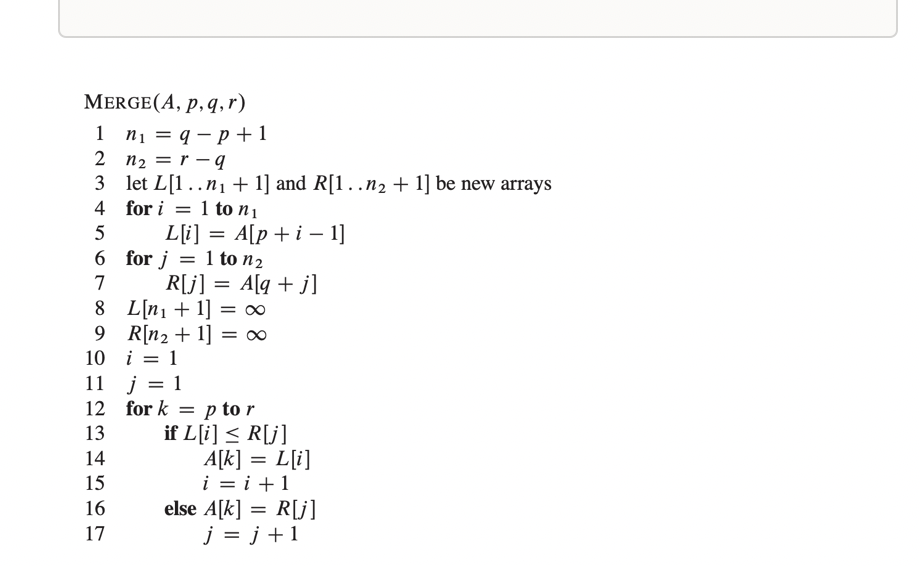

In [3]:
def merge(A, p, q, r, steps):
    # q = len(list)/2 -1 
    # r = len(list) - 1 (aka last element's index)
    # lengths of left and right lists 
    
    # part 1
    n1 = q - p + 1 
    n2 = r - q
    L = [None] * n1
    R = [None] * n2
    steps += 4
    for i in range(n1): 
        L[i] = A[p+i]
        steps +=1 
    for j in range(n2): 
        R[j] = A[q+j+1]
        steps +=1
        
    # part 2
    i = 0
    j = 0 
    k = p
    steps += 1
    while i < n1 and j < n2:
        steps += 2
        if L[i]<= R[j]:    
            A[k] = L[i]
            i += 1
            steps += 3
        else: 
            A[k] = R[j]
            j += 1
            steps += 3
        k += 1 
        steps +=1
    
    while i < n1: # to ensure that we took _all_ the elements from both sublists
        A[k] = L[i]
        k += 1 
        i += 1
        steps += 5
        
    while j < n2: 
        A[k]= R[j]
        k += 1 
        j += 1
        steps += 5 # adding 5 steps because: lines 44-46 are 3 steps and while takes 2 steps to update the
        #iterative value and do comparison
        
    return (A, steps)

test_list = [2,6,7,8,1,4,6,9]
merge(test_list, 0, 3, 7, 0)

([1, 2, 4, 6, 6, 7, 8, 9], 60)

In [4]:
# this was added to help me debugging code
from IPython.display import IFrame
IFrame("http://pythontutor.com/iframe-embed.html#code=def%20merge%28A,%20p,%20q,%20r,%20steps%29%3A%0A%20%20%20%20%23%20q%20%3D%20len%28list%29/2%20-1%20%0A%20%20%20%20%23%20r%20%3D%20len%28list%29%20-%201%20%28aka%20last%20element's%20index%29%0A%20%20%20%20%23%20lengths%20of%20left%20and%20right%20lists%20%0A%20%20%20%20%23%20part%201%0A%20%20%20%20n1%20%3D%20q%20-%20p%20%2B%201%20%0A%20%20%20%20n2%20%3D%20r%20-%20q%0A%20%20%20%20L%20%3D%20%5BNone%5D%20*%20n1%0A%20%20%20%20R%20%3D%20%5BNone%5D%20*%20n2%0A%20%20%20%20steps%20%2B%3D%204%0A%20%20%20%20for%20i%20in%20range%28n1%29%3A%20%0A%20%20%20%20%20%20%20%20L%5Bi%5D%20%3D%20A%5Bp%2Bi%5D%0A%20%20%20%20%20%20%20%20steps%20%2B%3D1%20%0A%20%20%20%20for%20j%20in%20range%28n2%29%3A%20%0A%20%20%20%20%20%20%20%20R%5Bj%5D%20%3D%20A%5Bq%2Bj%2B1%5D%0A%20%20%20%20%20%20%20%20steps%20%2B%3D1%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%23%20part%202%0A%20%20%20%20i%20%3D%200%0A%20%20%20%20j%20%3D%200%20%0A%20%20%20%20k%20%3D%20p%0A%20%20%20%20steps%20%2B%3D%201%0A%20%20%20%20while%20i%20%3C%20n1%20and%20j%20%3C%20n2%3A%0A%20%20%20%20%20%20%20%20steps%20%2B%3D%202%0A%20%20%20%20%20%20%20%20if%20L%5Bi%5D%3C%3D%20R%5Bj%5D%3A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20A%5Bk%5D%20%3D%20L%5Bi%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20i%20%2B%3D%201%0A%20%20%20%20%20%20%20%20%20%20%20%20steps%20%2B%3D%203%0A%20%20%20%20%20%20%20%20else%3A%20%0A%20%20%20%20%20%20%20%20%20%20%20%20A%5Bk%5D%20%3D%20R%5Bj%5D%0A%20%20%20%20%20%20%20%20%20%20%20%20j%20%2B%3D%201%0A%20%20%20%20%20%20%20%20%20%20%20%20steps%20%2B%3D%203%0A%20%20%20%20%20%20%20%20k%20%2B%3D%201%20%0A%20%20%20%20%20%20%20%20steps%20%2B%3D1%0A%20%20%20%20%0A%20%20%20%20while%20i%20%3C%20n1%3A%20%0A%20%20%20%20%20%20%20%20A%5Bk%5D%20%3D%20L%5Bi%5D%0A%20%20%20%20%20%20%20%20k%20%2B%3D%201%20%0A%20%20%20%20%20%20%20%20i%20%2B%3D%201%0A%20%20%20%20%20%20%20%20steps%20%2B%3D%205%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20while%20j%20%3C%20n2%3A%20%0A%20%20%20%20%20%20%20%20A%5Bk%5D%3D%20R%5Bj%5D%0A%20%20%20%20%20%20%20%20k%20%2B%3D%201%20%0A%20%20%20%20%20%20%20%20j%20%2B%3D%201%0A%20%20%20%20%20%20%20%20steps%20%2B%3D%205%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20return%20%28A,%20steps%29%0A%0Atest_list%20%3D%20%5B2,6,7,8,1,4,6,9%5D%0Amerge%28test_list,%200,%203,%207,%200%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=3&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false", width=900, height=350)


In [3]:
def merge(A, p, q, r, steps):
    # q = len(list)/2 -1 
    # r = len(list) - 1 (aka last element's index)
    # lengths of left and right lists 
    
    # part 1
    n1 = q - p + 1 
    n2 = r - q
    L = [None] * n1
    R = [None] * n2
    
    for i in range(n1): 
        L[i] = A[p+i]
    for j in range(n2): 
        R[j] = A[q+j+1]
        
    L.append(float('+inf'))
    R.append(float('+inf'))
        
    # part 2
    i = 0
    j = 0 
    k = p

    while i < n1 and j < n2:
        steps += 2
        if L[i]<= R[j]:    
            A[k] = L[i]
            i += 1
        else: 
            A[k] = R[j]
            j += 1
        k += 1
  
    return (A)

test_list = [2,6,7,8,1,4,6,9]
merge(test_list, 0, 3, 7, 0)

[1, 2, 4, 6, 6, 7, 8, 9]

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [4]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [5]:
def merge_sort(A,p,r,steps = 0): # adding a step counter 
    if p < r:
        q = (p+r-1)//2 # this is because we want to take a middle point that is on the left patch of sublists.
        # we also need to use floor division to ensure that the final result is int, not float
        merge_sort(A,p,q,steps)
        merge_sort(A,q+1,r,steps)
        steps = merge(A,p,q,r,steps)[1]
       
    return(A, steps)
    raise NotImplementedError()


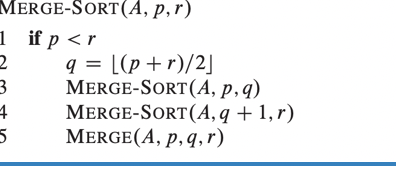

In [8]:
merge_sort(test_list, 0, 7, 0)

([1, 2, 4, 6, 6, 7, 8, 9], 57)

In [9]:
# making sure that everything works
assert(merge_sort([10,20,3,40,50],0,4, 0)[0]==[3,10,20,40,50])
assert(merge_sort([0,-2],0,1, 0)[0]==[-2,0])
assert(merge_sort([1,3,-8,8,2,4,-9,0],0,7, 0)[0]==[-9,-8,0,1,2,3,4,8])

In [10]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [11]:
import time 

for k in range(1,16): 
    list_k = [i for i in range(100*k, 0, -1)]
    a = time.time()  
    steps = merge_sort(list_k, 0, len(list_k)-1, 0)[1]
    b = time.time() 
    time_taken = round(b-a, 2)
    
    print("This operation for a list of size", k*100, "took", time_taken, "seconds and", steps, 'steps' )


This operation for a list of size 100 took 0.0 seconds and 655 steps
This operation for a list of size 200 took 0.0 seconds and 1305 steps
This operation for a list of size 300 took 0.0 seconds and 1955 steps
This operation for a list of size 400 took 0.0 seconds and 2605 steps
This operation for a list of size 500 took 0.0 seconds and 3255 steps
This operation for a list of size 600 took 0.0 seconds and 3905 steps
This operation for a list of size 700 took 0.0 seconds and 4555 steps
This operation for a list of size 800 took 0.0 seconds and 5205 steps
This operation for a list of size 900 took 0.0 seconds and 5855 steps
This operation for a list of size 1000 took 0.0 seconds and 6505 steps
This operation for a list of size 1100 took 0.01 seconds and 7155 steps
This operation for a list of size 1200 took 0.01 seconds and 7805 steps
This operation for a list of size 1300 took 0.01 seconds and 8455 steps
This operation for a list of size 1400 took 0.01 seconds and 9105 steps
This operati

# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

In [13]:

def bubbleSort(A):
    countB = 0
    for i in range(len(A)):  # last point is not included 
        countB += 1
        for j in range(len(A) - 1, i, -1): 
            if A[j] < A[j-1]:
                countB += 1 
                memory = A[j]
                countB += 1
                A[j] = A[j-1]
                countB += 1
                A[j-1] = memory
                countB += 1
    return (A, countB)

def selectionSort(A):
    countS=  0
    n = len(A)
    countS +=1
    for i in range(n - 1):
        countS +=1
        minidx = i
        for j in range(i+1, n):
            countS +=1
            if A[j] < A[minidx]:
                countS += 1
                minidx = j
                countS += 1
        if i != minidx:
            countS += 1
            A[i] = A[i] + A[minidx]
            countS +=1
            A[minidx] = A[i] - A[minidx]
            countS +=1
            A[i] = A[i] - A[minidx]
            countS +=1
    return (A, countS)


def insertionSort(A):
    countI = 0
    for j in range(len(A)):
        key = A[j]
        countI += 1
        i= j-1
        countI += 1
        while i >= 0 and A[i]>key:
            countI += 1
            A[i+1] = A[i]
            countI += 1
            i -= 1
            countI += 1
        A[i+1] = key
        countI += 1
    return (A, countI)

In [15]:
# creating storage for all times/steps
# testing all sorting algorithms with different input sizes
import time
selection_time =[]
selection_steps =[]

merge_time =[]
merge_steps =[]

bubble_time =[]
bubble_steps =[]

insertion_time =[]
insertion_steps =[]

for k in range(1,16): 

    list_k = [i for i in range(100*k, 0, -1)]
    a = time.time()  
    steps = merge_sort(list_k, 0, len(list_k)-1, 0)[1]
    b = time.time() 
    time_taken = round(b-a, 2)
    merge_time.append(time_taken)
    merge_steps.append(steps)
    
for k in range(1,16): 

    list_k = [i for i in range(100*k, 0, -1)]
    a = time.time()  
    steps = selectionSort(list_k)[1]
    b = time.time() 
    time_taken = round(b-a, 2)
    selection_time.append(time_taken)
    selection_steps.append(steps)

for k in range(1,16): 

    list_k = [i for i in range(100*k, 0, -1)]
    a = time.time()  
    steps = bubbleSort(list_k)[1]
    b = time.time() 
    time_taken = round(b-a, 2)
    bubble_time.append(time_taken)
    bubble_steps.append(steps)
    
for k in range(1,16): 

    list_k = [i for i in range(100*k, 0, -1)]
    a = time.time()  
    steps = insertionSort(list_k)[1]
    b = time.time() 
    time_taken = round(b-a, 2)
    insertion_time.append(time_taken)
    insertion_steps.append(steps)

### Graph 1.

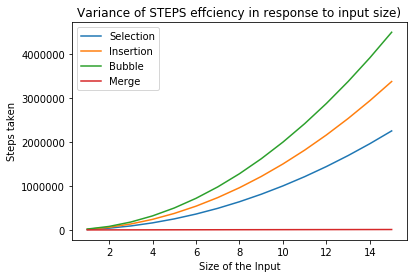

In [16]:
# steps
x_label = [i for i in range(1,16)]
import matplotlib.pyplot as plt
plt.plot(x_label,selection_steps)
plt.plot(x_label,insertion_steps)
plt.plot(x_label,bubble_steps)
plt.plot(x_label,merge_steps)
plt.legend(['Selection','Insertion','Bubble','Merge'])
plt.xlabel('Size of the Input')
plt.ylabel('Steps taken')
plt.title('Variance of STEPS effciency in response to input size)')
plt.show()

We can see that `bubbleSort` performs the worst in terms on steps #, whereas `merge_sort` is the most efficient of all. In terms of complexity, `merge_sort` takes $O(nlogn)$ steps and it should be valid for all three cases - worst, average, and best scenarios as the algorithm is independent of how well list is initially sorted, it will do sub-divisions anyways. It performs well because it has the least amount of ineffective comparisons.
`bubbleSort`, `selectionSort`, and `insertionSort` all perform in the worst case in the polynomial order of growth, which we can see from the graph. The worst-case complexity for them is $O(n^2)$. Even though these three sorts differ on the graph, on the high-level we can say that they all are having same asymptotic bound behavior (2nd polynomial order of growth).

### Graph 2.

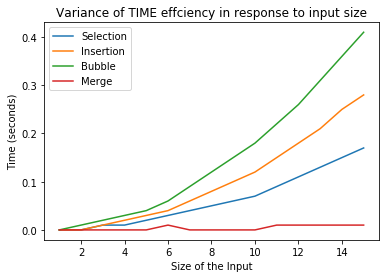

In [17]:
# time
x_label = [i for i in range(1,16)]
import matplotlib.pyplot as plt
plt.plot(x_label,selection_time)
plt.plot(x_label,insertion_time)
plt.plot(x_label,bubble_time)
plt.plot(x_label,merge_time)
plt.legend(['Selection','Insertion','Bubble','Merge',])
plt.xlabel('Size of the Input')
plt.ylabel('Time (seconds)')
plt.title('Variance of TIME effciency in response to input size')
plt.show()


Here we can see similar situation as time and # steps are derived from the same initial complexity behaviour. We can think of the total time taken as a `# of stesp` multiplied by the time each step takes. Because the operations done in this algorithms were basic and within RAM spectrum, it took time proportional to the # of steps. Thus, conclusions are the same as in the previous graph.

In [ ]:
# bubble < insertion < selection < merge 